## 收集数据
- tweet无法访问 :)
- 从github仓库[https://github.com/udacity/new-dand-advanced-china](https://github.com/udacity/new-dand-advanced-china)中下载文件

In [438]:
# -*- coding=utf-8 -*-
import requests

def download(url):
    with open(url.split('/')[-1], mode="wb") as f:
        respone = requests.get(url)
        f.write(respone.content)
        
# 下载 image-predictions.tsv
image_prediction_url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"
download(image_prediction_url)
# 下载 tweet_json.txt
tweet_json_url = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/tweet_json.txt"
download(tweet_json_url)

## 评估数据

In [439]:
# 使用pandas模块
import pandas as pd

In [440]:
# 读取和评估image-predictions.tsv数据
image_predictions = pd.read_csv("image-predictions.tsv", sep='\t')
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [441]:
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [442]:
# 处理和评估tweet_json.txt数据
import json
with open("tweet_json.txt", 'r') as json_file:
    for data in json_file.readlines():
        print(json.dumps(json.loads(data), indent=4, sort_keys=False, ensure_ascii=True))
        break

{
    "contributors": null, 
    "truncated": false, 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "id": 892420643555336193, 
    "favorite_count": 39492, 
    "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 
    "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", 
    "retweeted": false, 
    "coordinates": null, 
    "entities": {
        "symbols": [], 
        "user_mentions": [], 
        "hashtags": [], 
        "urls": [], 
        "media": [
            {
                "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", 
                "display_url": "pic.twitter.com/MgUWQ76dJU", 
                "url": "https://t.co/MgUWQ76dJU", 
                "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", 
                "id_str": "892420639486877696", 
                "sizes": {
    

In [443]:
# 逐行读取tweet_json.txt文件并添加到pandas DataFrame中，（至少）包含 tweet ID、retweet_count和favorite_count字段...
# 提出问题，放到list中，然后通过 'id_str': list1, 'fav_count': list2的方式创建df的效率是否更高？
df_tweet = pd.DataFrame()

# 观察tweet_json.txt后，对以下数据感兴趣：
# 'id_str', 'source', 'favorite_count', 'full_text', 'retweeted', 'retweet_count', 'created_at', 'expanded_url'
with open("tweet_json.txt", 'r') as json_file:
    indexs = ['id', 'source', 'favorite_count', 'full_text', 'retweeted', 'retweet_count', 'created_at']
    for data in json_file.readlines():
        dict_data = json.loads(data)
        
        data = []
        for idx in indexs:
            data.append(dict_data[idx])
        # print(type(dict_data['retweeted']));break
        # 获取media.expanded_url
        # print(dict_data['entities']);break;
        if dict_data['entities'].has_key('media'):
            data.append(dict_data['entities']['media'][0]['expanded_url'])
        else:
            data.append(None)
        
        s_tweet = pd.Series(data, index=indexs+['expanded_url'])
        df_tweet = df_tweet.append(s_tweet, ignore_index=True)

In [444]:
df_tweet.describe()

,favorite_count,id,retweet_count,retweeted
count,2352.000000,2.352000e+03,2352.000000,2352.0
mean,8109.198980,7.425913e+17,3134.932398,0.0
std,11980.795669,6.846210e+16,5237.846296,0.0
min,0.000000,6.660209e+17,0.000000,0.0
25%,1417.000000,6.783949e+17,618.000000,0.0
50%,3596.500000,7.193536e+17,1456.500000,0.0
75%,10118.000000,7.991219e+17,3628.750000,0.0
max,132318.000000,8.924206e+17,79116.000000,0.0


In [445]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 8 columns):
created_at        2352 non-null object
expanded_url      2073 non-null object
favorite_count    2352 non-null float64
full_text         2352 non-null object
id                2352 non-null float64
retweet_count     2352 non-null float64
retweeted         2352 non-null float64
source            2352 non-null object
dtypes: float64(4), object(4)
memory usage: 147.1+ KB


In [446]:
df_tweet

,created_at,expanded_url,favorite_count,full_text,id,retweet_count,retweeted,source
0,Tue Aug 01 16:23:56 +0000 2017,https://twitter.com/dog_rates/status/892420643...,39492.0,This is Phineas. He's a mystical boy. Only eve...,8.924206e+17,8842.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
1,Tue Aug 01 00:17:27 +0000 2017,https://twitter.com/dog_rates/status/892177421...,33786.0,This is Tilly. She's just checking pup on you....,8.921774e+17,6480.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
2,Mon Jul 31 00:18:03 +0000 2017,https://twitter.com/dog_rates/status/891815181...,25445.0,This is Archie. He is a rare Norwegian Pouncin...,8.918152e+17,4301.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
3,Sun Jul 30 15:58:51 +0000 2017,https://twitter.com/dog_rates/status/891689557...,42863.0,This is Darla. She commenced a snooze mid meal...,8.916896e+17,8925.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
4,Sat Jul 29 16:00:24 +0000 2017,https://twitter.com/dog_rates/status/891327558...,41016.0,This is Franklin. He would like you to stop ca...,8.913276e+17,9721.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
5,Sat Jul 29 00:08:17 +0000 2017,https://twitter.com/dog_rates/status/891087950...,20548.0,Here we have a majestic great white breaching ...,8.910880e+17,3240.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
6,Fri Jul 28 16:27:12 +0000 2017,https://twitter.com/dog_rates/status/890971913...,12053.0,Meet Jax. He enjoys ice cream so much he gets ...,8.909719e+17,2142.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
7,Fri Jul 28 00:22:40 +0000 2017,https://twitter.com/dog_rates/status/890729181...,66596.0,When you watch your owner call another dog a g...,8.907292e+17,19548.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
8,Thu Jul 27 16:25:51 +0000 2017,https://twitter.com/dog_rates/status/890609185...,28187.0,This is Zoey. She doesn't want to be one of th...,8.906092e+17,4403.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."
9,Wed Jul 26 15:59:51 +0000 2017,https://twitter.com/dog_rates/status/890240255...,32467.0,This is Cassie. She is a college pup. Studying...,8.902403e+17,7684.0,0.0,"<a href=""http://twitter.com/download/iphone"" r..."


#### 质量
- id应该是字符串类型、favorite_count、retweet_count应该是int类型，retweeted应该是bool类型
- 只需要不包括转发的数据，即保留retweeted为False的数据
- 只需要包含图片的原始评级，即保留expanded_url为空的数据
- created_at应该是date类型
- 从full_text中提取分数时，分子为浮点数，分母为10
- 从full_text中提取分数时，如果分数出现多次，那么则取均值作为分数
- 从full_text中提取狗的名字

#### 清洁度
- 拆分分数，分别得出分子rating_numerator和分母rating_denominator
- source字段内容是html文本，只需要获取该html的text部分即可

## 清理

In [447]:
# 清理前的备份
df_tweet_clean = df_tweet.copy()

#### `id`: 这个是用来识别用户的，数值比较大，且是整数，应该是long类型
#### `favorite_count、retweet_count`: 可能用于计数比较，应该是int类型


##### 定义
对id转换成long类型：astype('long')
对favorite_count、id、retweet_count做类型转换：astype('int')

##### 代码

In [448]:
df_tweet_clean['id'] = df_tweet_clean['id'].astype(long)
df_tweet_clean['favorite_count'] = df_tweet_clean['favorite_count'].astype(int)
df_tweet_clean['retweet_count'] = df_tweet_clean['retweet_count'].astype(int)

##### 测试

In [449]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 8 columns):
created_at        2352 non-null object
expanded_url      2073 non-null object
favorite_count    2352 non-null int32
full_text         2352 non-null object
id                2352 non-null int64
retweet_count     2352 non-null int32
retweeted         2352 non-null float64
source            2352 non-null object
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 128.7+ KB


#### `retweeted`: 应该是bool类型

##### 定义
对retweeted做类型转换：astype('bool')

##### 代码

In [450]:
df_tweet_clean['retweeted'] = df_tweet_clean['retweeted'].astype(bool)
df_tweet_clean.info()
#df_tweet_clean = df_tweet_clean[df_tweet_clean['retweeted'] == False]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 8 columns):
created_at        2352 non-null object
expanded_url      2073 non-null object
favorite_count    2352 non-null int32
full_text         2352 non-null object
id                2352 non-null int64
retweet_count     2352 non-null int32
retweeted         2352 non-null bool
source            2352 non-null object
dtypes: bool(1), int32(2), int64(1), object(4)
memory usage: 112.6+ KB


In [451]:
df_tweet_clean.retweeted.value_counts()

False    2352
Name: retweeted, dtype: int64

##### 测试
有上面可以知道，tweet_json.txt的数据都是原始评级的数据。

#### `expanded_url`: 应该包含图片的url

##### 定义
清理`expanded_url`为空的数据

##### 代码

In [452]:
df_tweet_clean = df_tweet_clean[df_tweet_clean['expanded_url'].notnull()]

##### 测试

In [453]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2351
Data columns (total 8 columns):
created_at        2073 non-null object
expanded_url      2073 non-null object
favorite_count    2073 non-null int32
full_text         2073 non-null object
id                2073 non-null int64
retweet_count     2073 non-null int32
retweeted         2073 non-null bool
source            2073 non-null object
dtypes: bool(1), int32(2), int64(1), object(4)
memory usage: 115.4+ KB


#### `created_at`: 应该是date类型

##### 定义
转换`created_at`的类型为date

##### 代码

In [454]:
# 时间字符串的格式 Tue Aug 01 16:23:56 +0000 2017
df_tweet_clean['created_at_timestamp'] = pd.to_datetime(df_tweet_clean['created_at'])

##### 测试

In [455]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2351
Data columns (total 9 columns):
created_at              2073 non-null object
expanded_url            2073 non-null object
favorite_count          2073 non-null int32
full_text               2073 non-null object
id                      2073 non-null int64
retweet_count           2073 non-null int32
retweeted               2073 non-null bool
source                  2073 non-null object
created_at_timestamp    2073 non-null datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int32(2), int64(1), object(4)
memory usage: 131.6+ KB


#### `full_text`: 从full_text中提取分数存放到rating

##### 定义
从`full_text`中提取分数时，分子为浮点数，分母为10

##### 代码

In [456]:
df_tweet_clean['rating'] = df_tweet_clean.full_text.str.findall(r'[1-9]+\/10|[1-9]+\.?[1-9]+\/10') 

In [457]:
df_tweet_clean.info()
df_tweet_clean.rating.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2351
Data columns (total 10 columns):
created_at              2073 non-null object
expanded_url            2073 non-null object
favorite_count          2073 non-null int32
full_text               2073 non-null object
id                      2073 non-null int64
retweet_count           2073 non-null int32
retweeted               2073 non-null bool
source                  2073 non-null object
created_at_timestamp    2073 non-null datetime64[ns]
rating                  2073 non-null object
dtypes: bool(1), datetime64[ns](1), int32(2), int64(1), object(5)
memory usage: 147.8+ KB


[12/10]           472
[]                436
[11/10]           413
[13/10]           283
[9/10]            150
[8/10]             94
[7/10]             53
[14/10]            41
[6/10]             33
[5/10]             33
[3/10]             19
[4/10]             16
[2/10]              9
[1/10]              4
[11/10, 8/10]       2
[12/10, 11/10]      2
[9.75/10]           1
[13.5/10]           1
[8/10, 1/10]        1
[15/10]             1
[11.27/10]          1
[8/10, 11/10]       1
[5/10, 8/10]        1
[7/10, 8/10]        1
[1776/10]           1
[9/10, 2/10]        1
[4/10, 13/10]       1
[11.26/10]          1
[7/10, 12/10]       1
Name: rating, dtype: int64

##### 定义

从`full_text`中提取分数时，如果分数出现多次，那么则取均值作为分数

In [458]:
## 怎么取平均值？
def get_avg(rl):
    if len(rl) <= 1:
        return rl
    else:
        rstr = 0
        for r in rl:
            #print "r:"+r[:-3]
            rstr = rstr + float(r[:-3])
        #print "rstr:"+str(rstr/2)
        return str(rstr/2)+'/10'
    
df_tweet_clean['rating_avg'] = df_tweet_clean.rating.map(get_avg)
df_tweet_clean['rating_avg'] = df_tweet_clean.rating_avg.astype(str).str[3:-2]

##### 测试

In [459]:
df_tweet_clean.sample()

,created_at,expanded_url,favorite_count,full_text,id,retweet_count,retweeted,source,created_at_timestamp,rating,rating_avg
1897,Wed Dec 09 17:46:48 +0000 2015,https://twitter.com/dog_rates/status/674646392...,1526,Two gorgeous dogs here. Little waddling dog is...,674646392044941312,553,False,"<a href=""http://twitter.com/download/iphone"" r...",2015-12-09 17:46:48,"[5/10, 8/10]",/


#### `full_text`: 从full_text中提取狗的名字

##### 定义
从`full_text`中提取狗的名字，This is ${dog_name}.

##### 代码

In [460]:
df_tweet_clean['dog_name'] = df_tweet_clean.full_text.str.findall(r'This is \w+\b\.')
#df_tweet_clean['dog_name'] = df_tweet_clean.full_text.str.split('.', 1)
df_tweet_clean['name'] = df_tweet_clean['dog_name'].map(lambda x: str(x)[11:-3])

##### 测试

In [461]:
df_tweet_clean[['name','dog_name']]

,name,dog_name
0,Phineas,[This is Phineas.]
1,Tilly,[This is Tilly.]
2,Archie,[This is Archie.]
3,Darla,[This is Darla.]
4,Franklin,[This is Franklin.]
5,,[]
6,,[]
7,,[]
8,Zoey,[This is Zoey.]
9,Cassie,[This is Cassie.]


In [462]:
# data['name'].str.split('|',expand=True)[0]
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2351
Data columns (total 13 columns):
created_at              2073 non-null object
expanded_url            2073 non-null object
favorite_count          2073 non-null int32
full_text               2073 non-null object
id                      2073 non-null int64
retweet_count           2073 non-null int32
retweeted               2073 non-null bool
source                  2073 non-null object
created_at_timestamp    2073 non-null datetime64[ns]
rating                  2073 non-null object
rating_avg              2073 non-null object
dog_name                2073 non-null object
name                    2073 non-null object
dtypes: bool(1), datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 196.4+ KB


In [463]:
df_tweet_clean.head()

,created_at,expanded_url,favorite_count,full_text,id,retweet_count,retweeted,source,created_at_timestamp,rating,rating_avg,dog_name,name
0,Tue Aug 01 16:23:56 +0000 2017,https://twitter.com/dog_rates/status/892420643...,39492,This is Phineas. He's a mystical boy. Only eve...,892420643555336192,8842,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 16:23:56,[13/10],13/10,[This is Phineas.],Phineas
1,Tue Aug 01 00:17:27 +0000 2017,https://twitter.com/dog_rates/status/892177421...,33786,This is Tilly. She's just checking pup on you....,892177421306343424,6480,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 00:17:27,[13/10],13/10,[This is Tilly.],Tilly
2,Mon Jul 31 00:18:03 +0000 2017,https://twitter.com/dog_rates/status/891815181...,25445,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4301,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31 00:18:03,[12/10],12/10,[This is Archie.],Archie
3,Sun Jul 30 15:58:51 +0000 2017,https://twitter.com/dog_rates/status/891689557...,42863,This is Darla. She commenced a snooze mid meal...,891689557279858688,8925,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-30 15:58:51,[13/10],13/10,[This is Darla.],Darla
4,Sat Jul 29 16:00:24 +0000 2017,https://twitter.com/dog_rates/status/891327558...,41016,This is Franklin. He would like you to stop ca...,891327558926688256,9721,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29 16:00:24,[12/10],12/10,[This is Franklin.],Franklin


## 清洁度

`rating`: 拆分分子和分母
##### 定义
拆分分数，分别得出分子 rating_numerator 和分母 rating_denominator 
##### 代码

In [464]:
df_tweet_clean['rating_numerator'] = df_tweet_clean['rating_avg'].map(lambda x: x.split('/')[0])
df_tweet_clean['rating_denominator'] = df_tweet_clean['rating_avg'].map(lambda x: x.split('/')[-1])

In [465]:
df_tweet_clean[['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10
5,13,10
6,13,10
7,13,10
8,13,10
9,14,10


`source`: 获取text内容
##### 定义
source字段内容是html文本，只需要获取该html的text部分即可
##### 代码

In [466]:
df_tweet_clean['source_text'] = df_tweet_clean.source.str.findall(r'>.*<').astype(str).str[4:-3]

In [467]:
df_tweet_clean.source_text

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
5       Twitter for iPhone
6       Twitter for iPhone
7       Twitter for iPhone
8       Twitter for iPhone
9       Twitter for iPhone
10      Twitter for iPhone
11      Twitter for iPhone
12      Twitter for iPhone
13      Twitter for iPhone
14      Twitter for iPhone
15      Twitter for iPhone
16      Twitter for iPhone
17      Twitter for iPhone
18      Twitter for iPhone
19      Twitter for iPhone
20      Twitter for iPhone
21      Twitter for iPhone
22      Twitter for iPhone
23      Twitter for iPhone
24      Twitter for iPhone
25      Twitter for iPhone
26      Twitter for iPhone
27      Twitter for iPhone
28      Twitter for iPhone
30      Twitter for iPhone
               ...        
2322    Twitter for iPhone
2323    Twitter for iPhone
2324    Twitter for iPhone
2325    Twitter for iPhone
2326    Twitter for iPhone
2327    Twitter for iPhone
2

`rating_numerator和rating_denominator`: 清理评分
##### 定义
如果分子评级超过分母评级，不需要进行清洗。
##### 代码

In [546]:
# 清理前先复制
df_tweet_clean2 = df_tweet_clean.copy()

In [547]:
df_tweet_clean2 = df_tweet_clean2[df_tweet_clean2.rating_numerator > df_tweet_clean2.rating_denominator]
# 排除分数过大的，把分子大于100的去掉
df_tweet_clean2['rating_numerator'] = df_tweet_clean2['rating_numerator'].astype(float)
#df_tweet_clean2['rating_denominator'] = df_tweet_clean2['rating_denominator'].astype(float)
df_tweet_clean2 = df_tweet_clean2[df_tweet_clean2['rating_numerator'] > 10]

##### 测试

In [548]:
df_tweet_clean2.info()
df_tweet_clean2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214 entries, 0 to 2335
Data columns (total 16 columns):
created_at              1214 non-null object
expanded_url            1214 non-null object
favorite_count          1214 non-null int32
full_text               1214 non-null object
id                      1214 non-null int64
retweet_count           1214 non-null int32
retweeted               1214 non-null bool
source                  1214 non-null object
created_at_timestamp    1214 non-null datetime64[ns]
rating                  1214 non-null object
rating_avg              1214 non-null object
dog_name                1214 non-null object
name                    1214 non-null object
rating_numerator        1214 non-null float64
rating_denominator      1214 non-null object
source_text             1214 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(1), object(10)
memory usage: 143.5+ KB


,created_at,expanded_url,favorite_count,full_text,id,retweet_count,retweeted,source,created_at_timestamp,rating,rating_avg,dog_name,name,rating_numerator,rating_denominator,source_text
0,Tue Aug 01 16:23:56 +0000 2017,https://twitter.com/dog_rates/status/892420643...,39492,This is Phineas. He's a mystical boy. Only eve...,892420643555336192,8842,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 16:23:56,[13/10],13/10,[This is Phineas.],Phineas,13.0,10,Twitter for iPhone
1,Tue Aug 01 00:17:27 +0000 2017,https://twitter.com/dog_rates/status/892177421...,33786,This is Tilly. She's just checking pup on you....,892177421306343424,6480,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-08-01 00:17:27,[13/10],13/10,[This is Tilly.],Tilly,13.0,10,Twitter for iPhone
2,Mon Jul 31 00:18:03 +0000 2017,https://twitter.com/dog_rates/status/891815181...,25445,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,4301,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-31 00:18:03,[12/10],12/10,[This is Archie.],Archie,12.0,10,Twitter for iPhone
3,Sun Jul 30 15:58:51 +0000 2017,https://twitter.com/dog_rates/status/891689557...,42863,This is Darla. She commenced a snooze mid meal...,891689557279858688,8925,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-30 15:58:51,[13/10],13/10,[This is Darla.],Darla,13.0,10,Twitter for iPhone
4,Sat Jul 29 16:00:24 +0000 2017,https://twitter.com/dog_rates/status/891327558...,41016,This is Franklin. He would like you to stop ca...,891327558926688256,9721,False,"<a href=""http://twitter.com/download/iphone"" r...",2017-07-29 16:00:24,[12/10],12/10,[This is Franklin.],Franklin,12.0,10,Twitter for iPhone


In [549]:
df_tweet_clean2.rating_numerator.value_counts()

12.00      472
11.00      413
13.00      283
14.00       41
1776.00      1
11.27        1
11.26        1
15.00        1
13.50        1
Name: rating_numerator, dtype: int64

##### 定义
删除分数过大(1776)的数据
##### 代码

In [550]:
df_tweet_clean2 = df_tweet_clean2[ df_tweet_clean2['rating_numerator'] < 100]

##### 测试

In [551]:
df_tweet_clean2.info()
df_tweet_clean2.rating_numerator.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1213 entries, 0 to 2335
Data columns (total 16 columns):
created_at              1213 non-null object
expanded_url            1213 non-null object
favorite_count          1213 non-null int32
full_text               1213 non-null object
id                      1213 non-null int64
retweet_count           1213 non-null int32
retweeted               1213 non-null bool
source                  1213 non-null object
created_at_timestamp    1213 non-null datetime64[ns]
rating                  1213 non-null object
rating_avg              1213 non-null object
dog_name                1213 non-null object
name                    1213 non-null object
rating_numerator        1213 non-null float64
rating_denominator      1213 non-null object
source_text             1213 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int32(2), int64(1), object(10)
memory usage: 143.3+ KB


12.00    472
11.00    413
13.00    283
14.00     41
11.27      1
11.26      1
15.00      1
13.50      1
Name: rating_numerator, dtype: int64

#### 保存最终数据

##### 定义
只保存需要的列数据
##### 代码

In [552]:
# 只保留部分列
index = ['id', 'name','rating_numerator','rating_denominator','created_at_timestamp', 'source_text', 'full_text', 'expanded_url','favorite_count', 'retweet_count','doggo','floofer','pupper','puppo']
twitter_archive_master = df_tweet_clean2.reindex(index, axis=1)
twitter_archive_master

,id,name,rating_numerator,rating_denominator,created_at_timestamp,source_text,full_text,expanded_url,favorite_count,retweet_count,doggo,floofer,pupper,puppo
0,892420643555336192,Phineas,13.0,10,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,39492,8842,NaN,NaN,NaN,NaN
1,892177421306343424,Tilly,13.0,10,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,33786,6480,NaN,NaN,NaN,NaN
2,891815181378084864,Archie,12.0,10,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,25445,4301,NaN,NaN,NaN,NaN
3,891689557279858688,Darla,13.0,10,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,42863,8925,NaN,NaN,NaN,NaN
4,891327558926688256,Franklin,12.0,10,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,41016,9721,NaN,NaN,NaN,NaN
5,891087950875897856,,13.0,10,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,20548,3240,NaN,NaN,NaN,NaN
6,890971913173991424,,13.0,10,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,12053,2142,NaN,NaN,NaN,NaN
7,890729181411237888,,13.0,10,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,66596,19548,NaN,NaN,NaN,NaN
8,890609185150312448,Zoey,13.0,10,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,28187,4403,NaN,NaN,NaN,NaN
9,890240255349198848,Cassie,14.0,10,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,32467,7684,NaN,NaN,NaN,NaN


In [553]:
# 把数据保存到 twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

UnicodeEncodeError: 'ascii' codec can't encode characters in position 112-115: ordinal not in range(128)

## 数据分析和可视化

In [554]:
# -*- coding=utf-8 -*-
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

# 读取twitter_archive_master.csv
twitter_archive_master = pd.read_csv("twitter_archive_master.csv")
twitter_archive_master.info()
twitter_archive_master.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 14 columns):
id                      46 non-null int64
name                    34 non-null object
rating_numerator        46 non-null float64
rating_denominator      46 non-null int64
created_at_timestamp    46 non-null object
source_text             46 non-null object
full_text               46 non-null object
expanded_url            46 non-null object
favorite_count          46 non-null int64
retweet_count           46 non-null int64
doggo                   0 non-null float64
floofer                 0 non-null float64
pupper                  0 non-null float64
puppo                   0 non-null float64
dtypes: float64(5), int64(4), object(5)
memory usage: 5.1+ KB


,id,name,rating_numerator,rating_denominator,created_at_timestamp,source_text,full_text,expanded_url,favorite_count,retweet_count,doggo,floofer,pupper,puppo
0,892420643555336192,Phineas,13.0,10,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,39492,8842,NaN,NaN,NaN,NaN
1,892177421306343424,Tilly,13.0,10,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,33786,6480,NaN,NaN,NaN,NaN
2,891815181378084864,Archie,12.0,10,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,25445,4301,NaN,NaN,NaN,NaN


In [555]:
twitter_archive_master.describe()

,id,rating_numerator,rating_denominator,favorite_count,retweet_count,doggo,floofer,pupper,puppo
count,4.600000e+01,46.000000,46.0,46.000000,46.000000,0.0,0.0,0.0,0.0
mean,8.874508e+17,12.815217,10.0,30968.000000,6990.434783,NaN,NaN,NaN,NaN
std,2.902109e+15,0.551349,0.0,14154.334315,4416.938068,NaN,NaN,NaN,NaN
min,8.826273e+17,12.000000,10.0,0.000000,2142.000000,NaN,NaN,NaN,NaN
25%,8.849860e+17,12.250000,10.0,22834.500000,4326.500000,NaN,NaN,NaN,NaN
50%,8.874086e+17,13.000000,10.0,28378.000000,5735.500000,NaN,NaN,NaN,NaN
75%,8.898270e+17,13.000000,10.0,35395.250000,7954.750000,NaN,NaN,NaN,NaN
max,8.924206e+17,14.000000,10.0,78881.000000,19548.000000,NaN,NaN,NaN,NaN


In [560]:
# 查看转发数最多的tweet
pd.set_option('max_colwidth',2000)
twitter_archive_master[twitter_archive_master.retweet_count==twitter_archive_master.retweet_count.max()].full_text

7    When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Name: full_text, dtype: object

In [561]:
# 查看favorite最多的tweet
twitter_archive_master[twitter_archive_master.favorite_count==twitter_archive_master.favorite_count.max()].full_text

34    This is Earl. He found a hat. Nervous about what you think of it. 12/10 it's delightful, Earl https://t.co/MYJvdlNRVa
Name: full_text, dtype: object

#### 这些推文，通过什么渠道发出的？我们通过source_text来分析下：
代码

In [536]:
twitter_archive_master.source_text.value_counts()

Twitter for iPhone    1190
Twitter Web Client      16
TweetDeck                7
Name: source_text, dtype: int64

([<matplotlib.patches.Wedge at 0x114d5c18>,
 [Text(1.09982,0.0199414,u'TweetDeck'),
  Text(1.09668,0.0853819,u'Twitter Web Client'),
  Text(-1.09805,-0.0654866,u'Twitter for iPhone')])

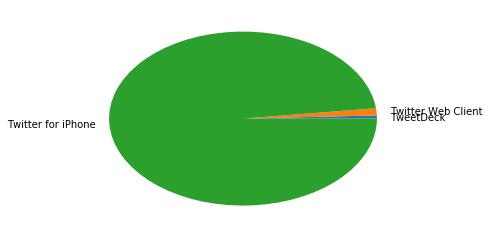

In [545]:
# 画图
by_source = twitter_archive_master.groupby(['source_text'])['source_text'].count()
plt.pie(by_source, labels=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone'])